# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [112]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [113]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [130]:
df.head()
df.count()

PRIMARY_KEY                           1715
STATE                                 1715
YEAR                                  1715
ENROLL_ALL_EST                        1632
TOTAL_REVENUE                         1275
FEDERAL_REVENUE                       1275
STATE_REVENUE                         1275
LOCAL_REVENUE                         1275
TOTAL_EXPENDITURE                     1275
INSTRUCTION_EXPENDITURE               1275
SUPPORT_SERVICES_EXPENDITURE          1275
OTHER_EXPENDITURE                     1224
CAPITAL_OUTLAY_EXPENDITURE            1275
ENROLL_PREK                           1542
ENROLL_KINDER                         1632
ENROLL_4                              1632
ENROLL_8                              1632
ENROLL_12                             1632
ENROLL_PRIMARY                        1020
ENROLL_HS                             1071
ENROLL_ALL                            1632
AVG_MATH_4_SCORE                       565
AVG_MATH_8_SCORE                       602
AVG_READING

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *AVG_READING_4_SCORE*

How many years of data are logged in our dataset? 

In [115]:
#np.max(df["YEAR"])-np.min(df["YEAR"])
df["YEAR"].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [116]:
Mavg = np.mean(df[df["STATE"] == "MICHIGAN"]["AVG_READING_4_SCORE"])
Oavg = np.mean(df[df["STATE"] == "OHIO"]["AVG_READING_4_SCORE"])
if Mavg > Oavg:
    print("Michigan")
else:
    print("Ohio")

Ohio


Find the average for your outcome score across all states in 2019

In [117]:
#df[df["YEAR"] == 2019].groupby("STATE")["AVG_READING_4_SCORE"].mean()
df[df["YEAR"] == 2019]["AVG_READING_4_SCORE"].mean()

219.79245283018867

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [118]:
df.groupby("STATE")["AVG_READING_4_SCORE"].max()

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [121]:
df["SUPPORT_EXPENDITURE_PER_STUDENT"] = df["SUPPORT_SERVICES_EXPENDITURE"]/df["ENROLL_ALL"]
df["LOCAL_REVENUE_PER_STUDENT"] = df["LOCAL_REVENUE"]/df["ENROLL_ALL"]
df["INSTRUCTION_EXPENDITURE_PERCENTAGE"] = df["INSTRUCTION_EXPENDITURE"]/df["TOTAL_EXPENDITURE"]

Feature engineering justification: **I plotted multiple variations of expenditure and revenue per student as well as percentages of expenditures sent to instruction and percentages of revenue generated on a local or state level. The goal was to identify any patterns in the plot, but I specifically chose these variables as I am of the belief that financial inequality heavily impacts the academic quality of schools and success of their students. Based on the tools and data provided to us from this data set, it would be difficult to prove my claim, but the amount of money spent on support services per student, the amount of local revenue per student, and the percentage of expenses that go towards instruction seem like the closest available metrics by which to support my theory. Based on this and a general curiosity, I checked the plots of these potential columns and found interesting enough correlations for all three new variables, but for the local revenue per student variable in particular. I also debated between which enrollment numbers to use but ultimately decided "ENROLL_ALL" was best as it seems that the revenue and expenditure numbers were for the state overall and all students as opposed to 4th graders alone.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Reading Score')

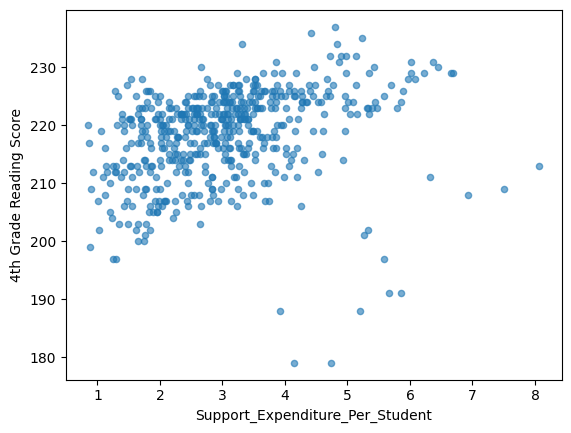

In [132]:
col_name = "SUPPORT_EXPENDITURE_PER_STUDENT"
df.plot.scatter(x=col_name, y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel(col_name.title())
plt.ylabel('4th Grade Reading Score')

**This scatterplot illustrates the relationship between 4th grade reading scores and the amount of money spent on support services per student.**

**Visualization 2**

Text(0, 0.5, '4th Grade Reading Score')

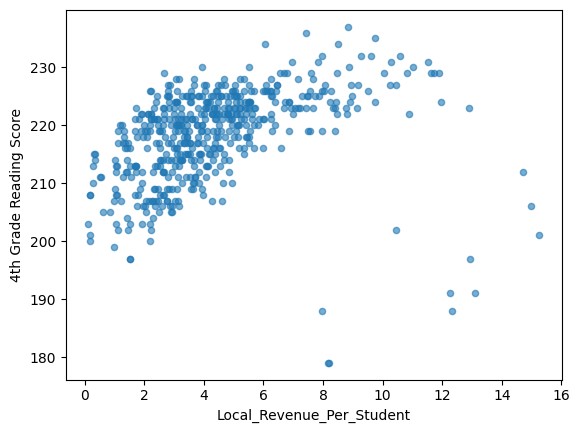

In [133]:
col_name = "LOCAL_REVENUE_PER_STUDENT"
df.plot.scatter(x=col_name, y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel(col_name.title())
plt.ylabel('4th Grade Reading Score')

**This scatterplot illustrates the relationship between 4th grade reading scores and the amount of revenue generated locally per student.**

**Visualization 3**

Text(0, 0.5, '4th Grade Reading Score')

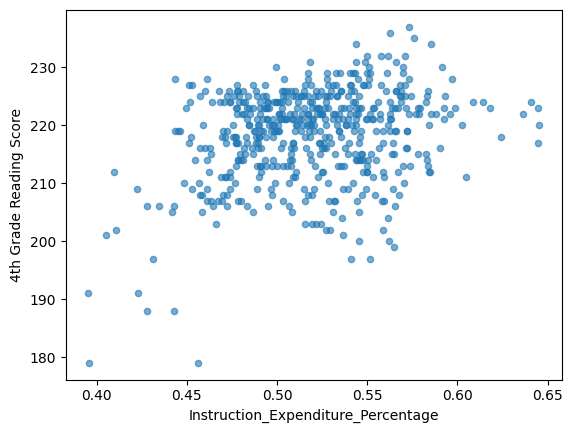

In [134]:
col_name = "INSTRUCTION_EXPENDITURE_PERCENTAGE"
df.plot.scatter(x=col_name, y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel(col_name.title())
plt.ylabel('4th Grade Reading Score')

**This scatterplot illustrates the relationship between 4th grade reading scores and the percentage of expenses that go towards instruction.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [361]:
from sklearn.model_selection import train_test_split

In [429]:
X = df[['SUPPORT_EXPENDITURE_PER_STUDENT','LOCAL_REVENUE_PER_STUDENT','INSTRUCTION_EXPENDITURE_PERCENTAGE']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE'] 
y.fillna(y.mean(), inplace=True)

In [430]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [464]:
# import your sklearn class here
#from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR

In [465]:
# create your model here
#svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
#svr_lin = SVR(kernel="linear", C=100, gamma="auto")
#model =  BayesianRidge()
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [466]:
svr_poly.fit(X_train, y_train)
#model.fit(X_train, y_train)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [475]:
y_pred = svr_poly.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [476]:
score = svr_poly.score(X_test, y_test)
errsqr = np.mean((svr_poly.predict(X_test)-y_test)**2)**0.5
print(score)
print(errsqr)

0.10723481794911505
4.083191615863116


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

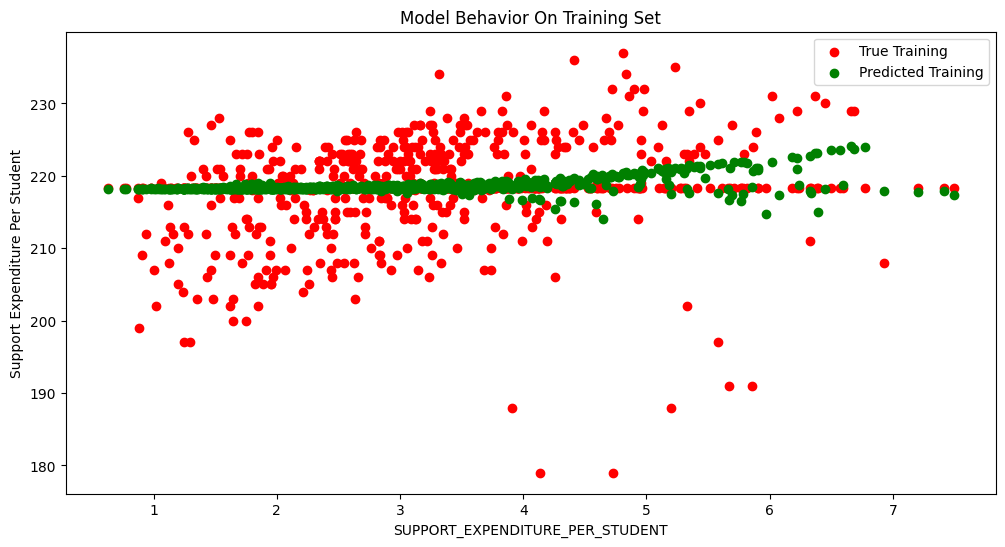

In [477]:
col_name = 'SUPPORT_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], svr_poly.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('SUPPORT EXPENDITURE PER STUDENT'.title())
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

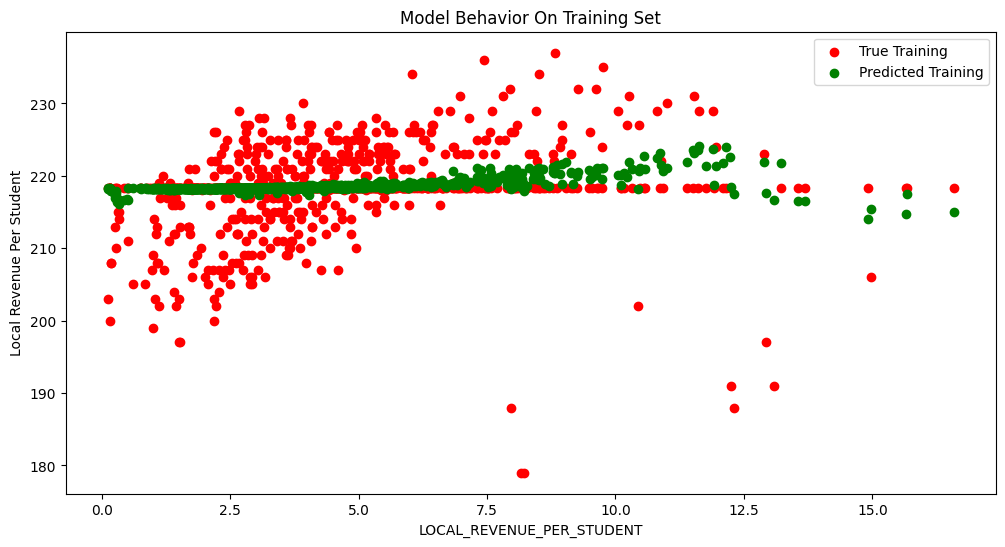

In [478]:
col_name = 'LOCAL_REVENUE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], svr_poly.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('LOCAL REVENUE PER STUDENT'.title())
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

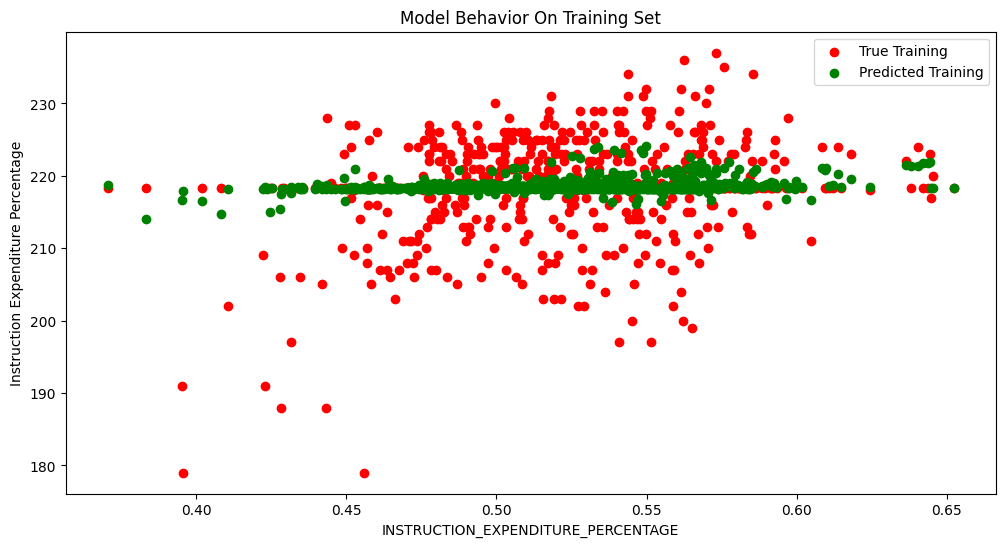

In [479]:
col_name = 'INSTRUCTION_EXPENDITURE_PERCENTAGE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], svr_poly.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('INSTRUCTION EXPENDITURE PERCENTAGE'.title())
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

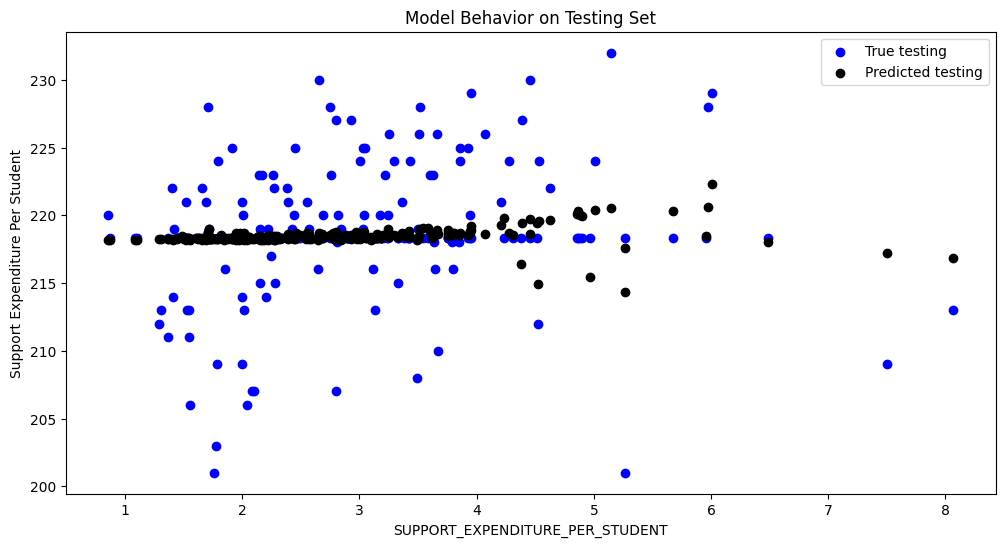

In [480]:
col_name = 'SUPPORT_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], svr_poly.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('SUPPORT EXPENDITURE PER STUDENT'.title())
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

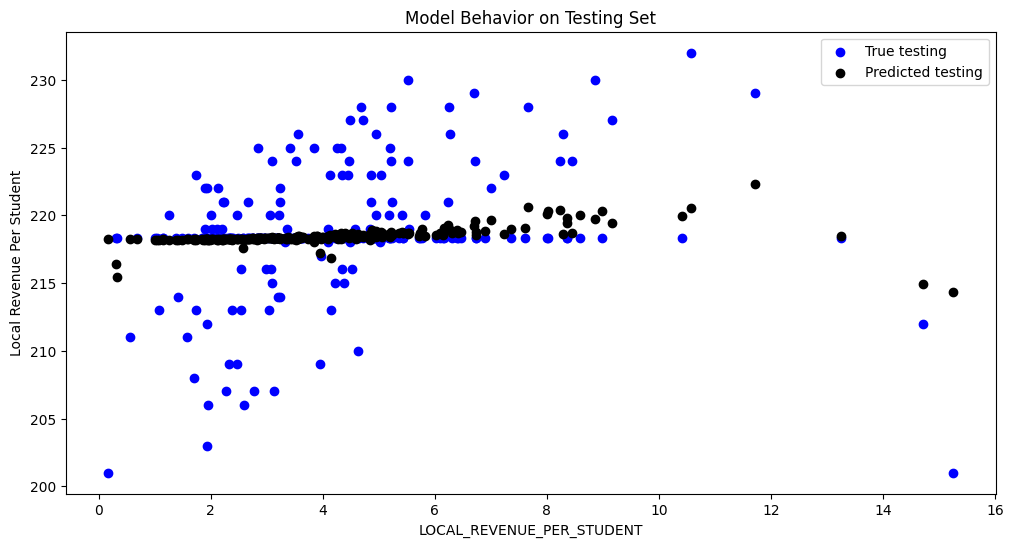

In [481]:
col_name = 'LOCAL_REVENUE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], svr_poly.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('LOCAL REVENUE PER STUDENT'.title())
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

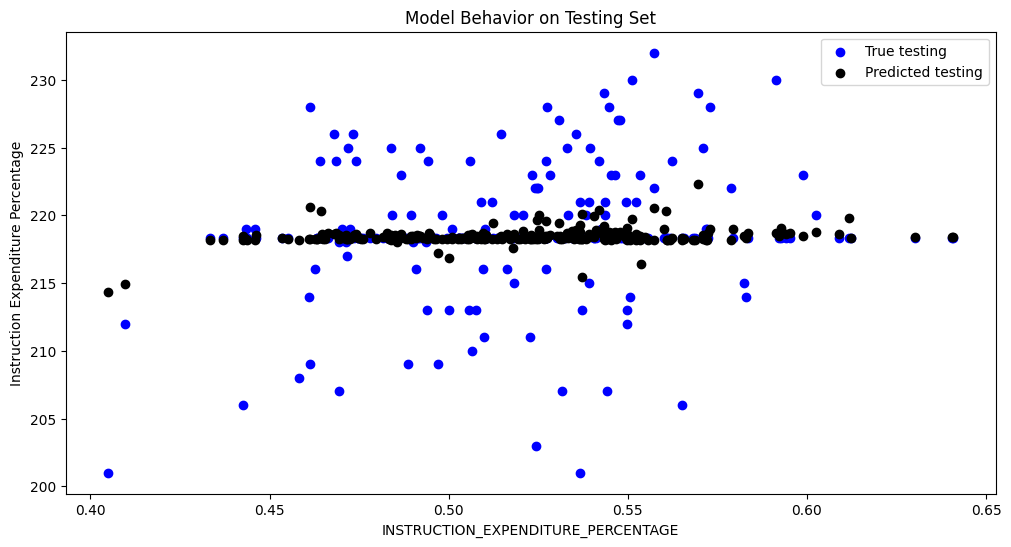

In [482]:
col_name = 'INSTRUCTION_EXPENDITURE_PERCENTAGE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], svr_poly.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('INSTRUCTION EXPENDITURE PERCENTAGE'.title())
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

I tested various models and found that the support vector regression model produced the best results though all models had around a 4 for average error squared. The r values for most of the linear regression models were very low which I believe indicates linear models being inefficient as models for the data. I then checked the documentation for scikitlearn to find the svr_poly model. After applying it, the score rose from around 0.04 and 0.08 for some of the earlier models to 0.1. While still low, the non-linear model had the most success. I then visually modeled the training and testing accuracy and the testing accuracy astonishingly closely matches some excessive outliers. For me this indicates with more time and testing a better model with greater accuracy can be developed. Furthermore, the matching of some of the outliers shows some level of learning that the model underwent to accurately predict certain data points. Overall, focusing on the data itself, it seems that there is a general trend where the more revenue, support services spending, and instruction spending the higher average reading score. Now while correlation does not mean causation, it seems evident that there may be a significant relationship between available resources for students and their academic success.